# Altair examples

In [1]:
using Revise

In [2]:
using VegaDatasets, VegaLite, DataFrames

## Bar Charts

#### Bar Chart with Highlight

```python
import altair as alt
import pandas as pd

data = pd.DataFrame({"Day": range(1, 16),
                     "Value": [54.8, 112.1, 63.6, 37.6, 79.7, 137.9, 120.1, 103.3,
                               394.8, 199.5, 72.3, 51.1, 112.0, 174.5, 130.5]})

data2 = pd.DataFrame([{"ThresholdValue": 300, "Threshold": "hazardous"}])

bar1 = alt.Chart(data).mark_bar().encode(
    x='Day:O',
    y='Value:Q'
)

bar2 = alt.Chart(data).mark_bar(color="#e45755").encode(
    x='Day:O',
    y='baseline:Q',
    y2='Value:Q'
).transform_filter(
    "datum.Value >= 300"
).transform_calculate(
    "baseline", "300"
)

rule = alt.Chart(data2).mark_rule().encode(
    y='ThresholdValue:Q'
)

text = alt.Chart(data2).mark_text(
    align='left', dx=215, dy=-5
).encode(
    alt.Y('ThresholdValue:Q', axis=alt.Axis(title='PM2.5 Value')),
    text=alt.value('hazardous')
)

bar1 + text + bar2 + rule
```

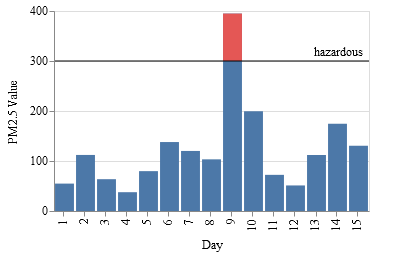

In [3]:
data = DataFrame(Day=1:15,
    Value=[54.8, 112.1, 63.6, 37.6, 79.7, 137.9, 120.1, 103.3,394.8, 199.5, 72.3, 51.1, 112.0, 174.5, 130.5])

data2 = DataFrame(ThresholdValue=300,Threshold="hazardous")

@vlplot() +
@vlplot(:bar,data=data,enc={x="Day:o",y="Value:q"}) +
@vlplot(
    data=data,
    transform=[
        {filter="datum.Value >= 300"},
        {calculate="300",as=:baseline}
    ],
    mark={:bar,color="#e45755"},
    enc={x="Day:o",y="baseline:q",y2="Value:q"}) +
@vlplot(:rule,data=data2,enc={y="ThresholdValue:q"}) +
@vlplot(
    data=data2,
    mark={:text,align=:left,dx=215,dy=-5},
    enc={
        y={"ThresholdValue:q",axis={title="PM2.5 Value"}},
        text={value="hazardous"}
    })

#### Box Plot with Min/Max Whiskers

```python
import altair as alt
from vega_datasets import data

population = data.population.url

# Define aggregate fields
lower_box = 'q1(people):Q'
lower_whisker = 'min(people):Q'
upper_box = 'q3(people):Q'
upper_whisker = 'max(people):Q'

# Compose each layer individually
lower_plot = alt.Chart(population).mark_rule().encode(
    y=alt.Y(lower_whisker, axis=alt.Axis(title="population")),
    y2=lower_box,
    x='age:O'
)

middle_plot = alt.Chart(population).mark_bar(size=5.0).encode(
    y=lower_box,
    y2=upper_box,
    x='age:O'
)

upper_plot = alt.Chart(population).mark_rule().encode(
    y=upper_whisker,
    y2=upper_box,
    x='age:O'
)

middle_tick = alt.Chart(population).mark_tick(
    color='white',
    size=5.0
).encode(
    y='median(people):Q',
    x='age:O',
)

lower_plot + middle_plot + upper_plot + middle_tick
```

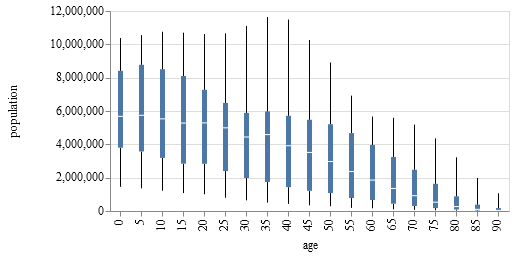

In [4]:
# Define aggregate fields
lower_box = "q1(people):Q"
lower_whisker = "min(people):Q"
upper_box = "q3(people):Q"
upper_whisker = "max(people):Q"

dataset("population") |>
@vlplot() +
@vlplot(:rule,enc={
    y={lower_whisker,axis={title="population"}},
    y2=lower_box,
    x="age:o"}) +
@vlplot(mark={:bar,size=5.},enc={
    y=lower_box,y2=upper_box,x="age:o"
    }) +
@vlplot(:rule,enc={y=upper_whisker,y2=upper_box,x="age:o"}) +
@vlplot(mark={:tick,color=:white,size=5.},enc={y="median(people):q",x="age:o"})